# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

In [31]:
import csv
import pandas as pd
import xlwings as xw
import numpy as np

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [45]:
reviews = pd.read_csv('reviews_sample.csv', index_col = 0)
recipes = pd.read_csv('recipes_sample.csv')[['name', 'id', 'minutes', 'submitted', 'description', 'n_ingredients']]

In [46]:
# reviews

In [47]:
# recipes

2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [48]:
%pip install xlwings

Note: you may need to restart the kernel to use updated packages.


In [49]:
random_reviews = reviews.sample(frac = 0.05)
random_recipes = recipes.sample(frac = 0.05)

In [50]:
with pd.ExcelWriter('recipes.xlsx', engine='openpyxl') as writer:
    random_recipes.to_excel(writer, sheet_name='Рецепты')
    random_reviews.to_excel(writer, sheet_name='Отзывы')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [51]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

sheet.range('G1').value = 'seconds_assign'
minutes = sheet.range('D2').expand('down').value
seconds = [time * 60 for time in minutes]
sheet.range('G2').options(transpose=True).value = seconds

wb.save()

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [52]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

sheet.range("H1").value = "seconds_formula"
formula = '=60 * D2'
sheet.range('H2:H1501').formula = formula
wb.save()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [53]:
from xlwings.constants import AutoFillType

In [54]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

sheet.range('A1:I1').font.bold = True
sheet['A1:H1'].api.horizontalalignment = xw.constants.HAlign.xlHAlignCenter
wb.save()

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [55]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

green = '00FF00'
yellow = 'FFFF00'
red = 'FF0000'

minutes_range = sheet.range("D2:D1501").value

for i in range(len(minutes_range)):
    if minutes_range[i] <= 5:
        sheet.range(f"D{i+2}").color = green
    elif 5 < minutes_range[i] <= 10:
        sheet.range(f"D{i+2}").color = yellow
    else:
        sheet.range(f"D{i+2}").color =  red

wb.save()

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [56]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

sheet.range('I1').value = 'n_reviews'
n = str(len(reviews) + 1)

sheet.range("I2:I1501").formula = f'=COUNTIF(Отзывы!$C$2:$C${n}, "="&C2)'
wb.save()

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [57]:
sht_rev = wb.sheets['Отзывы']
sht_rec = wb.sheets['Рецепты']
id_arrays = sht_rec.range('C2:C1501').options(ndim = 1).value

for i in range(6337):
    if (sht_rev.range((i+2,3)).value in id_arrays) and (sht_rev.range((i+2,5)).value in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]):
        sht_rev.range((i+2, 2)).expand('right').color = (0, 255, 0)
    else:
        sht_rev.range((i+2, 2)).expand('right').color = (255, 0, 0)

In [59]:
wb.save()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [61]:
rec_mod = pd.read_csv('recipes_model.csv', delimiter = '\t', index_col = 0)
# rec_mod
wb = xw.Book('recipes_model.xlsx')
sht_mod = wb.sheets['Модель']

sht_mod.range('A2').value = rec_mod


In [62]:
wb.save()

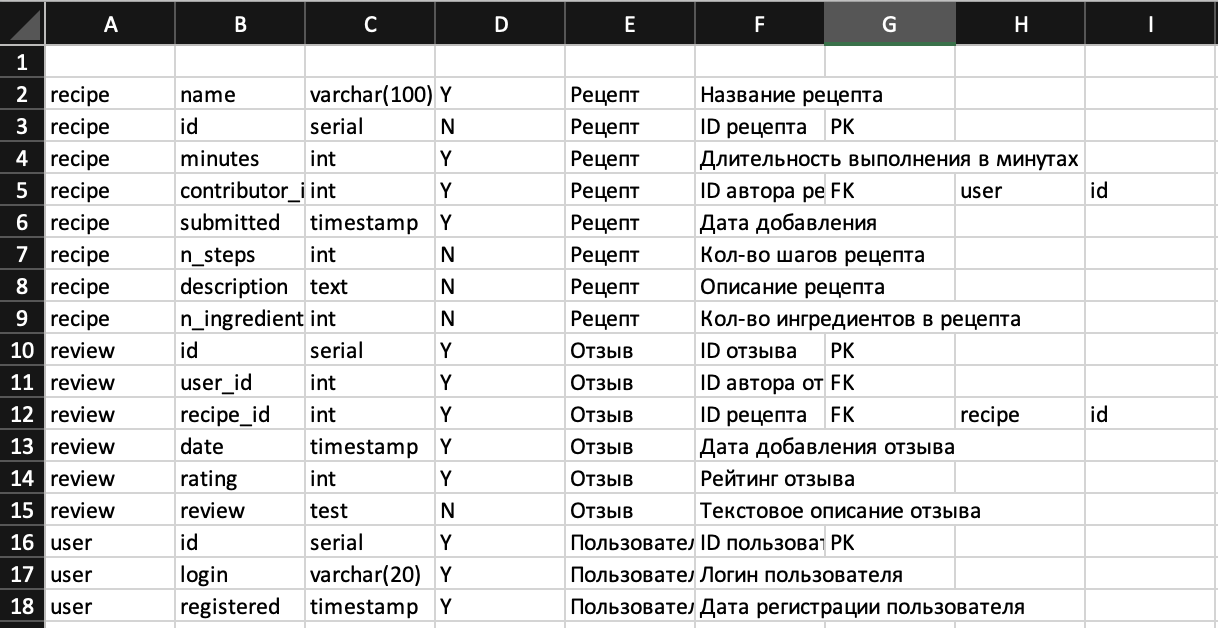

In [63]:
from IPython.display import Image
Image('/Users/ilya/Desktop/прога/ТОД/04_excel/model_9.png')

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [64]:
fml = '=CONCAT(B2, " ", UPPER(C2), " ", IF(G2 = "PK", "PRIMARY KEY", IF(G2 = "FK", CONCAT("REFERENCES", " ", H2, "(", I2, ")"),)), " ", IF(AND(D2="Y", G2<>"PK"), "NOT NULL",))'
sht_mod.range('J2:J18').formula = fml
wb.save()

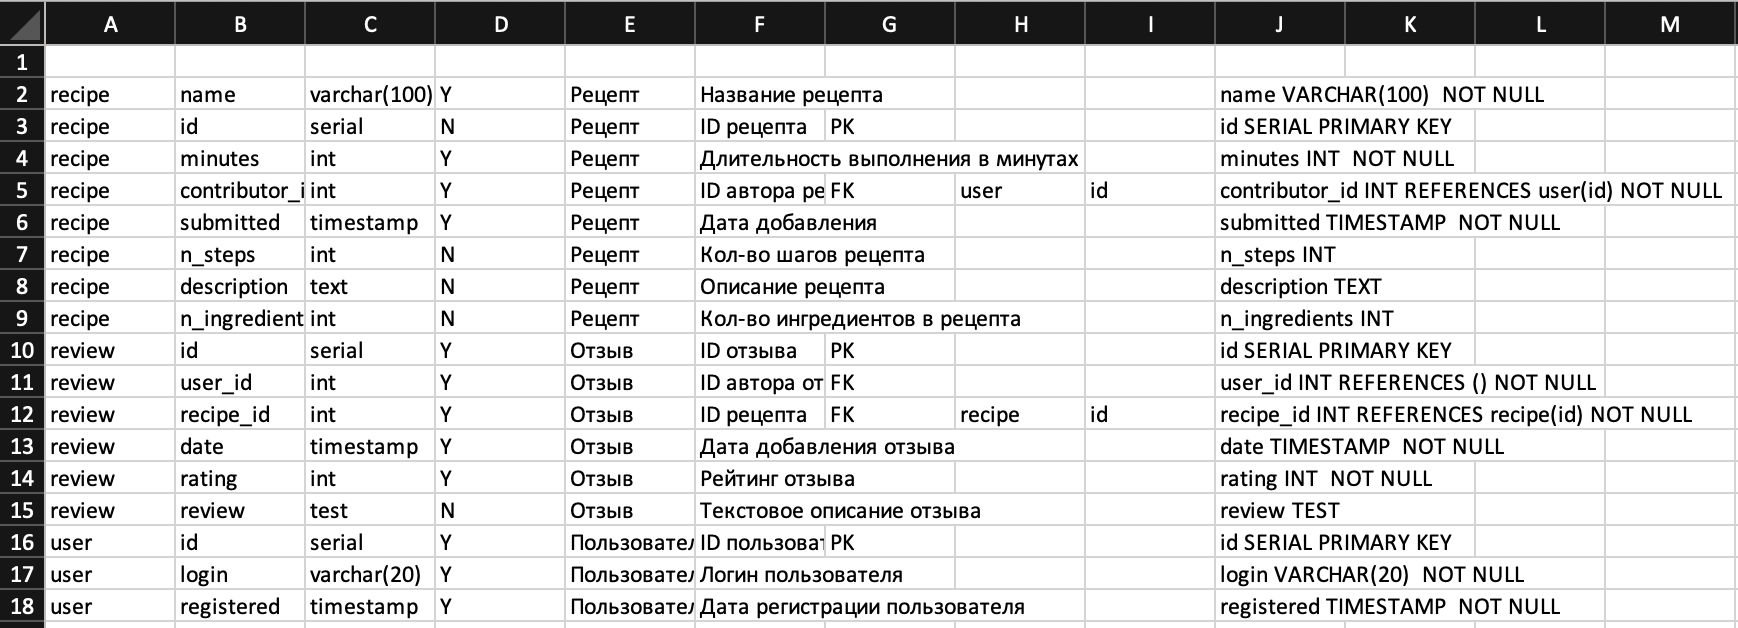

In [65]:
from IPython.display import Image
Image('/Users/ilya/Desktop/прога/ТОД/04_excel/model_10.png')

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [66]:
title = ['Тип таблицы', 'Столбец', 'Тип данных', 'Обязательно к заполнению', 'Название листа', 'Атрибут', 'Ключ', 'Родитель', 'Внешний ключ', 'SQL']
sht_mod.range('A1').value = title
sht_mod.autofit()
sht_mod.range('A1').expand('right').color = '00ccff'
sht_mod.range('A1').expand('right').font.bold = True

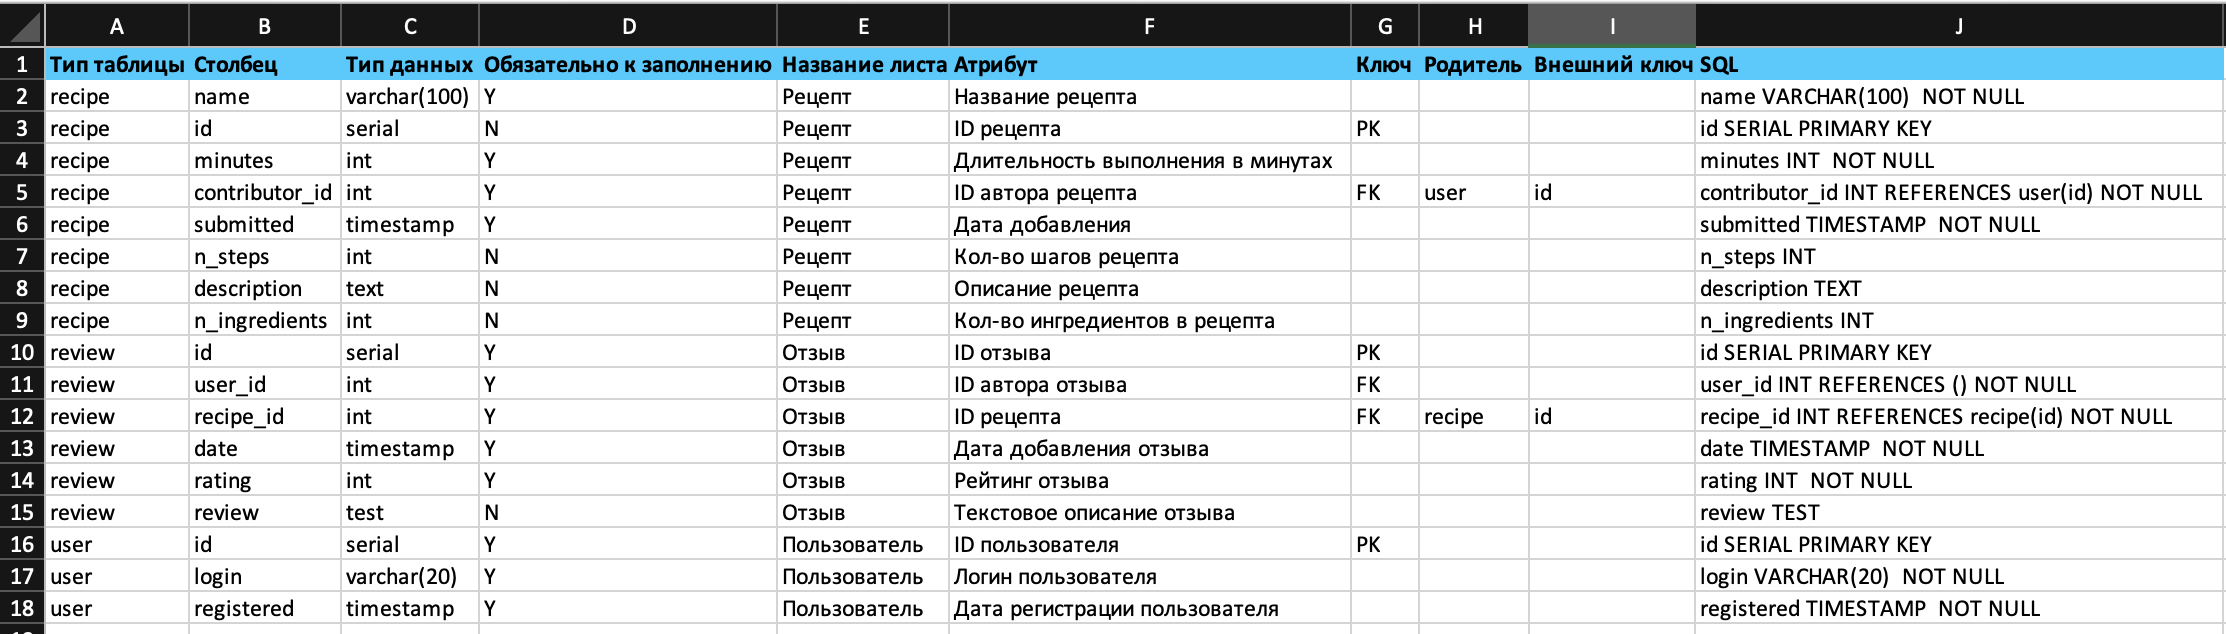

In [67]:
from IPython.display import Image
Image('/Users/ilya/Desktop/прога/ТОД/04_excel/model_11.png')

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [78]:
wb = xw.Book('recipes_model.xlsx')
# wb.sheets.add(name = 'Статистика', after = wb.sheets[0].name)
sht_st = wb.sheets['Статистика']
tables = sht_mod.range('A2').expand('down').value
atributes = sht_mod.range('B2').expand('down').value
df = pd.DataFrame({'Тип таблицы':tables, 'Столбец':atributes}).groupby('Тип таблицы').count()
df

,Столбец
Тип таблицы,
recipe,8
review,6
user,3


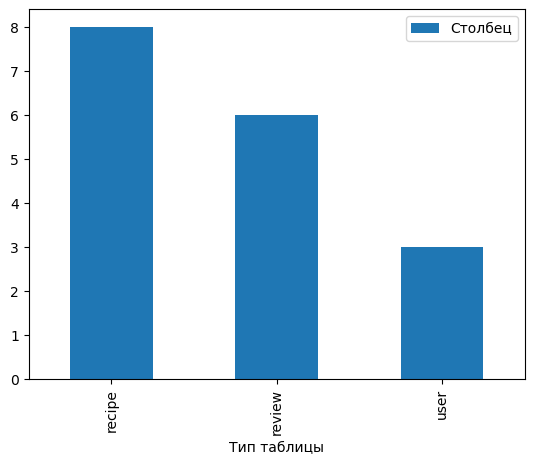

In [91]:
import matplotlib as plt
sht_st.range('A1').value = df
graph = df.plot.bar()

In [92]:
fig = graph.get_figure()
sht_st.pictures.add(fig, name='График', left=sht_st.range('E2').left, update = True)

<Picture 'График' in <Sheet [recipes_model.xlsx]Статистика>>

In [93]:
wb.save()